# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 6. 10. 2024. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

> ❌ Zkopírovaný kód ze cvičení (především ze cvičení 2) nebude uznán!

> ‼️ Akceptovatelný je úkol pouze v češtině, slovenštině nebo angličtině.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [99]:
# a teď už je to na vás 💪
# níže vložte své řešení
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Příprava dat

In [100]:
intakes_df = pd.read_csv('intakes.csv')
outcomes_df = pd.read_csv('outcomes.csv')

After reading the data, let's see what we have to work with

In [101]:
print('Intakes:')
display(intakes_df.info())
display(intakes_df.describe())
print()

print('Outcomes:')
display(outcomes_df.info())
display(outcomes_df.describe())



Intakes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167556 entries, 0 to 167555
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167556 non-null  object
 1   Name              119338 non-null  object
 2   DateTime          167556 non-null  object
 3   MonthYear         167556 non-null  object
 4   Found Location    167556 non-null  object
 5   Intake Type       167556 non-null  object
 6   Intake Condition  167556 non-null  object
 7   Animal Type       167556 non-null  object
 8   Sex upon Intake   167554 non-null  object
 9   Age upon Intake   167555 non-null  object
 10  Breed             167556 non-null  object
 11  Color             167556 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


None

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,167556,119338,167556,167556,167556,167556,167556,167556,167554,167555,167556,167556
unique,150561,29042,115549,133,67994,6,20,5,5,55,2966,650
top,A721033,Luna,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,724,64,2189,30530,114927,142264,91648,56729,27379,33623,17386



Outcomes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167559 entries, 0 to 167558
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         167559 non-null  object
 1   Name              119476 non-null  object
 2   DateTime          167559 non-null  object
 3   MonthYear         167559 non-null  object
 4   Date of Birth     167559 non-null  object
 5   Outcome Type      167515 non-null  object
 6   Outcome Subtype   76968 non-null   object
 7   Animal Type       167559 non-null  object
 8   Sex upon Outcome  167556 non-null  object
 9   Age upon Outcome  167512 non-null  object
 10  Breed             167559 non-null  object
 11  Color             167559 non-null  object
dtypes: object(12)
memory usage: 15.3+ MB


None

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,167559,119476,167559,167559,167559,167515,76968,167559,167556,167512,167559,167559
unique,150558,28979,139792,133,8486,11,26,5,5,55,2964,653
top,A721033,Luna,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,724,39,2244,121,80724,39348,91604,58699,27844,33986,17407


We will replace the data that does not make sense with the np.nan type to simplify the analysis in the future. Let's also make sure that we get rid of duplicates in dataframes that can distort data.

In [102]:
intakes_df.replace({'': np.nan, ' ': np.nan, 'Unkown': np.nan}, inplace=True)
outcomes_df.replace({'': np.nan, ' ': np.nan, 'Unkown': np.nan}, inplace=True)

In [103]:
print('Duplicates in intakes:', intakes_df.duplicated().sum())
print('Duplicates in outcomes:', outcomes_df.duplicated().sum())

Duplicates in intakes: 32
Duplicates in outcomes: 24


In [104]:
intakes_df.drop_duplicates(inplace=True)
outcomes_df.drop_duplicates(inplace=True)

In [105]:
print('Duplicates in intakes:', intakes_df.duplicated().sum())
print('Duplicates in outcomes:', outcomes_df.duplicated().sum())

Duplicates in intakes: 0
Duplicates in outcomes: 0


Let's convert columns with a limited number of values to the category type

In [106]:
category_columns_intakes = [
    'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color'
]
category_columns_outcomes = [
    'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color'
]

for col in category_columns_intakes:
    intakes_df[col].astype('category')

for col in category_columns_outcomes:
    outcomes_df[col].astype('category')

Let's add an age column for intake/outcome in months to both dataframes, which will greatly simplify the creation of visualizations. The values of age less than or equal to 0 months will be considered as indefinite and we will get rid of them

In [107]:
def convert_string_age_to_int_days(age_str):
    if pd.isna(age_str):
        return age_str
    
    number, unit = age_str.split(' ')
    
    number = float(number)

    if number <= 0:
        return np.nan
    
    if 'year' in unit:
        result_in_months = number * 12
    elif 'month' in unit:
        result_in_months = number
    elif 'week' in unit:
        result_in_months = number * 0.230137
    elif 'day' in unit:
        result_in_months = number * 0.0328767
    else:
        print('Undefined unit: ', unit)
        return age_str
    return round(result_in_months, 2)

intakes_df['Age upon Intake (months)'] = intakes_df['Age upon Intake'].apply(convert_string_age_to_int_days)
outcomes_df['Age upon Outcome (months)'] = outcomes_df['Age upon Outcome'].apply(convert_string_age_to_int_days)

intakes_df['Age upon Intake (months)'].dropna(inplace=True)
outcomes_df['Age upon Outcome (months)'].dropna(inplace=True)

Let's check that the new column in both dataframes is calculated correctly

In [108]:
display(intakes_df['Age upon Intake (months)'].describe())
display(outcomes_df['Age upon Outcome (months)'].describe())

count    166319.000000
mean         23.528104
std          33.637212
min           0.030000
25%           2.000000
50%          12.000000
75%          24.000000
max         360.000000
Name: Age upon Intake (months), dtype: float64

count    167213.000000
mean         23.935765
std          33.711597
min           0.030000
25%           2.000000
50%          12.000000
75%          24.000000
max         360.000000
Name: Age upon Outcome (months), dtype: float64

Let's convert the 'DateTime' column in both dataframes to a data type understandable for pandas

In [109]:
intakes_df['DateTime'] = pd.to_datetime(intakes_df['DateTime'], format='%m/%d/%Y %I:%M:%S %p')
outcomes_df['DateTime'] = pd.to_datetime(outcomes_df['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

In each of the dataframes, we will create separate columns for the year, month and day extracted from DateTime, which will simplify writing code for analysis in the future

In [110]:
intakes_df['Year'] = intakes_df['DateTime'].dt.year
intakes_df['Month'] = intakes_df['DateTime'].dt.month
intakes_df['Day'] = intakes_df['DateTime'].dt.day

display(intakes_df.head())

outcomes_df['Year'] = outcomes_df['DateTime'].dt.year
outcomes_df['Month'] = outcomes_df['DateTime'].dt.month
outcomes_df['Day'] = outcomes_df['DateTime'].dt.day

display(outcomes_df.head())


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Age upon Intake (months),Year,Month,Day
0,A786884,*Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,24.00,2019,1,3
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,96.00,2015,7,5
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,11.00,2016,4,14
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0.92,2013,10,21
4,A857105,Johnny Ringo,2022-05-12 00:23:00,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby,24.00,2022,5,12


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age upon Outcome (months),Year,Month,Day
0,A882831,*Hamilton,2023-07-01 18:12:00,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,3.0,2023,7,1
1,A794011,Chunk,2019-05-08 18:20:00,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,24.0,2019,5,8
2,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,12.0,2018,7,18
3,A821648,NaN,2020-08-16 11:38:00,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,12.0,2020,8,16
4,A720371,Moose,2016-02-13 17:59:00,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4.0,2016,2,13


## 2) Deskriptivní statistiky (Univariační)

- **Description of the Age upon Intake attribute**

To describe this feature, we use the column with the age of animals in months, prepared earlier. Since the spread of the number of animals by their age is too large, we will use a logarithmic scale on the Y axis so that the data can be seen more clearly

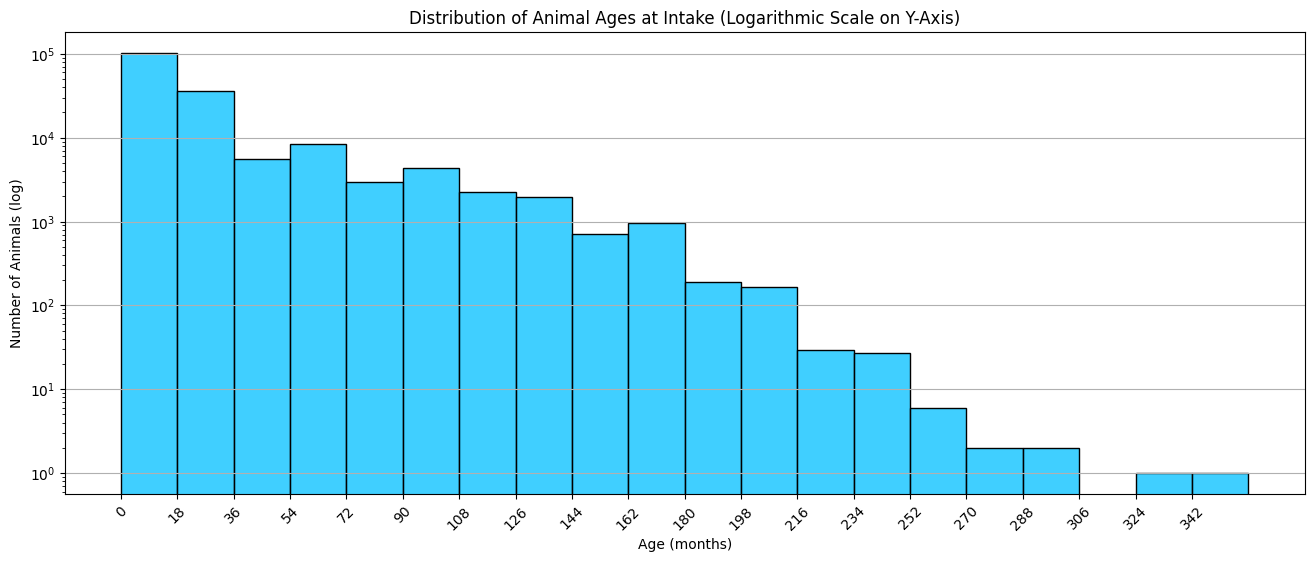

In [111]:
plt.figure(figsize=(16, 6))
hist = sns.histplot(intakes_df['Age upon Intake (months)'].dropna(), bins=20, color='deepskyblue')

plt.yscale('log')

plt.title('Distribution of Animal Ages at Intake (Logarithmic Scale on Y-Axis)')
plt.xlabel('Age (months)')
plt.ylabel('Number of Animals (log)')
plt.grid(axis='y')

bin_edges = hist.patches[0].get_x() + hist.patches[0].get_width() * np.arange(len(hist.patches))
plt.xticks(bin_edges, rotation=45)

plt.show()

The constructed histogram allows us to see that shelters mainly face the problem of admission of young animals, and older animals are much less common

- **Description of the DateTime attribute**

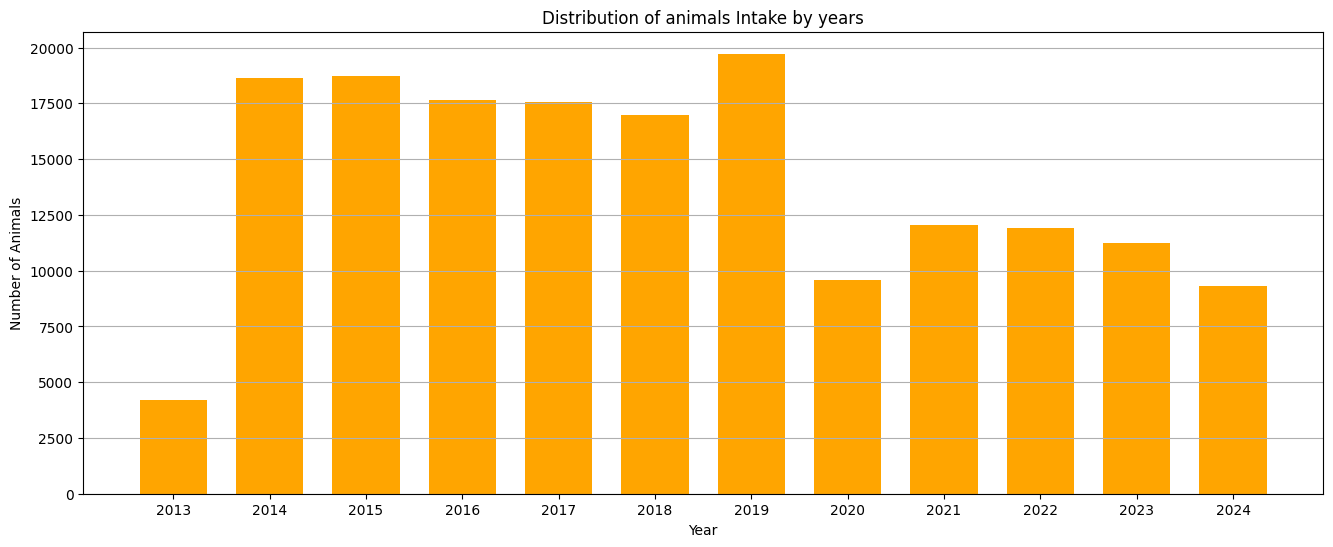

In [112]:
year_counts = intakes_df['Year'].value_counts().sort_index()

years = year_counts.index
counts = year_counts.values

plt.figure(figsize=(16, 6))
plt.bar(years, counts, width=0.7, color='orange')

plt.title('Distribution of animals Intake by years')
plt.xlabel('Year')
plt.ylabel('Number of Animals')
plt.grid(axis='y')

plt.xticks(ticks=years)
plt.show()


This bar chart clearly reflects the sharp drop in the number of animals received after the outbreak of the Covid-19 epidemic. You can also notice a gradual decrease in the number of animals received after 2021

- **Description of the Animal Type attribute**

Since the distribution of the number of animals by their species is also very uneven, a logarithmic scale should be used on the Y axis again

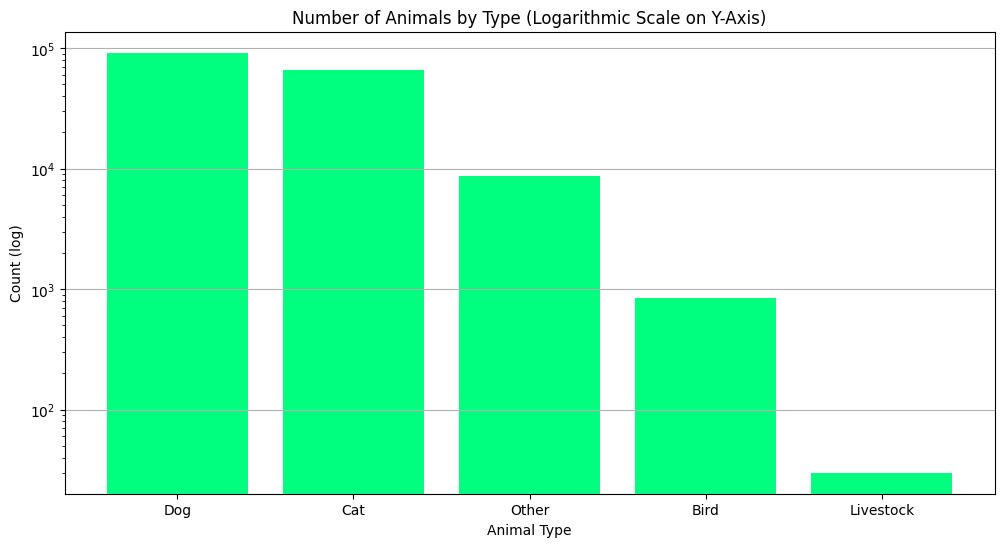

In [113]:
animal_counts = intakes_df['Animal Type'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(animal_counts.index, animal_counts.values, color='springgreen')
plt.yscale('log')
plt.title('Number of Animals by Type (Logarithmic Scale on Y-Axis)')
plt.xlabel('Animal Type')
plt.ylabel('Count (log)')
plt.grid(axis='y')
plt.show()

The diagram clearly shows that the predominant animal species at admission are dogs and cats

- **Description of the Sex Upon Intake attribute**

Since the number of animals in this feature does not have as large a spread as the previous ones, we use a pie chart 

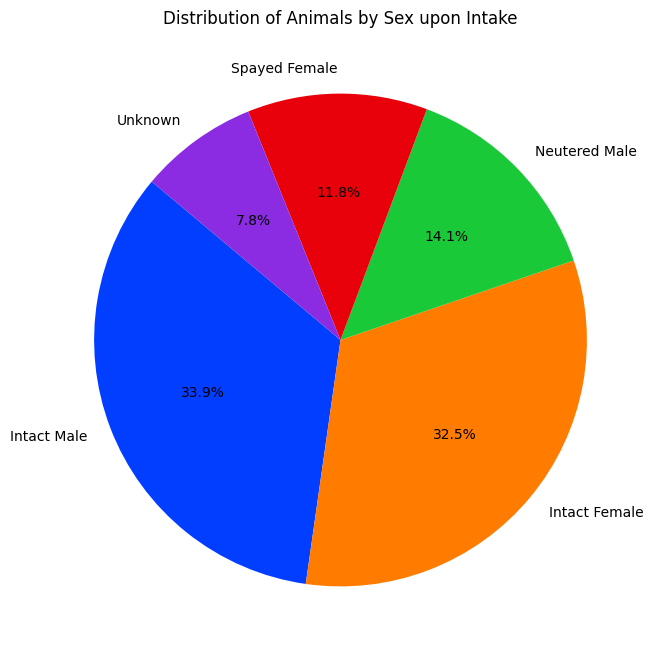

In [114]:
animal_counts = intakes_df['Sex upon Intake'].value_counts()

plt.figure(figsize=(8, 8))

colors = sns.color_palette('bright', 5)

plt.pie(animal_counts, labels=animal_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Animals by Sex upon Intake')
plt.show()

The pie chart shows the predominance of intact animals, while the distribution of spayed females and neutered males is close to the same

- **Description of the Animal Intake Conditions attribute**

For the reasons described above, we use a logarithmic scale on the Y axis

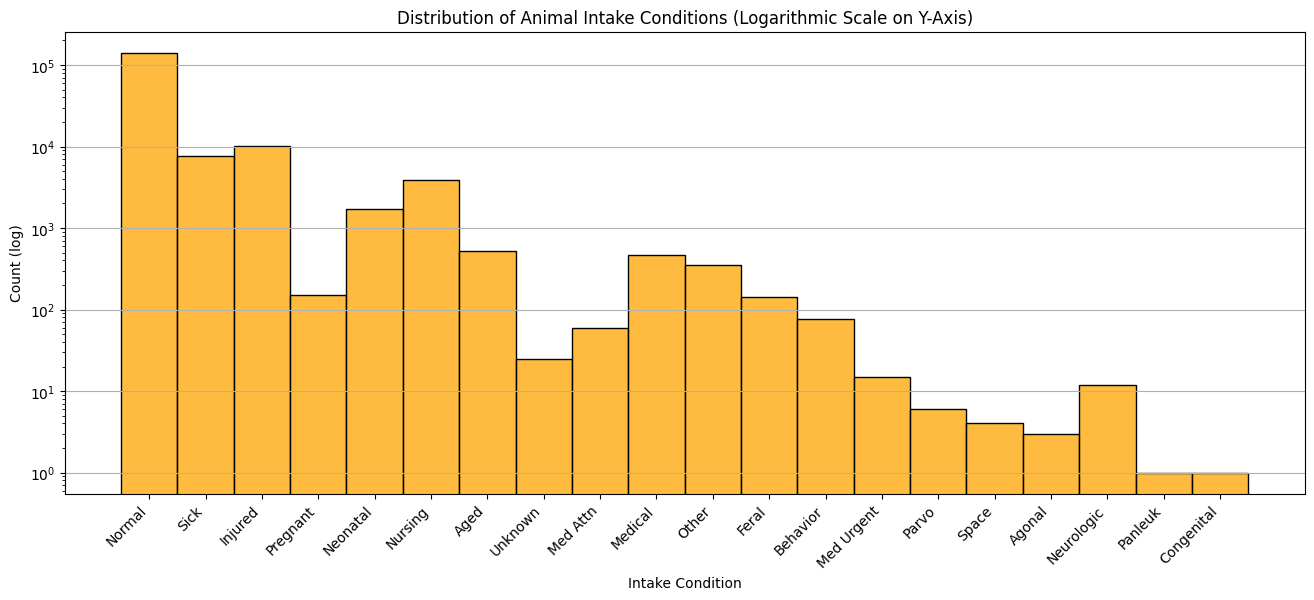

In [115]:
plt.figure(figsize=(16, 6))
hist = sns.histplot(intakes_df['Intake Condition'].dropna(), bins=20, binwidth=0.6, color='orange')

plt.yscale('log')

plt.title('Distribution of Animal Intake Conditions (Logarithmic Scale on Y-Axis)')
plt.xlabel('Intake Condition')
plt.ylabel('Count (log)')
plt.grid(axis='y')

bin_edges = [patch.get_x() + patch.get_width() / 2 for patch in hist.patches]

plt.xticks(bin_edges, rotation=45, ha='right')

plt.show()


The bar chart clearly reflects the predominance of animals in normal condition among those taken. However, if we count all animals with health problems (Sick, Injured, Nursing, etc.), we can see that their number is also quite large. Let's illustrate this with a pie chart:

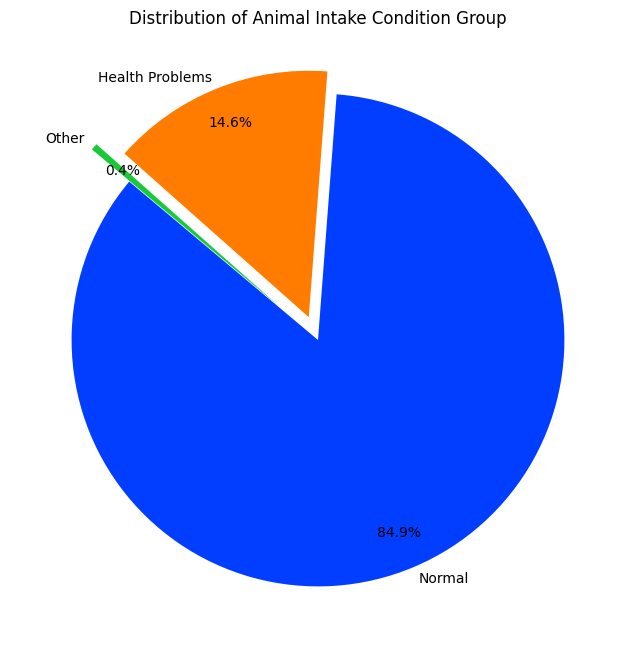

In [116]:
health_problems = [
    'Sick', 'Injured', 'Neonatal', 'Nursing', 'Aged', 
    'Med Attn', 'Medical', 'Med Urgent', 'Parvo', 'Agonal', 
    'Neurologic', 'Panleuk', 'Congenital'
]

def classify_condition(condition):
    if condition == 'Normal':
        return 'Normal'
    elif condition in health_problems:
        return 'Health Problems'
    else:
        return 'Other'

intakes_df['Condition Group'] = intakes_df['Intake Condition'].apply(classify_condition)

condition_counts = intakes_df['Condition Group'].value_counts()

explode = [0, 0.1, 0.2]
plt.figure(figsize=(8, 8))

colors = sns.color_palette('bright', 3)

plt.pie(
    condition_counts, 
    labels=condition_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.05,
    explode=explode,
    colors=colors,
)
plt.title('Distribution of Animal Intake Condition Group')
plt.show()

We see that the percentage of animals requiring closer attention to their health is about 14.6%, which, of course, creates an increased pressure on the shelter

## 3) Deskriptivní statistiky (Bivariační)

- **Description of the relationship between the Intake Type and Intake Condition attributes**

In [117]:
contingency_table = pd.crosstab(intakes_df['Intake Type'], intakes_df['Intake Condition'])

contingency_table.columns.name = 'Intake Condition'
contingency_table.index.name = 'Intake Type'

print('Contingency Table: Intake Type vs. Intake Condition')
display(contingency_table)


Contingency Table: Intake Type vs. Intake Condition


Intake Condition,Aged,Agonal,Behavior,Congenital,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Neurologic,Normal,Nursing,Other,Panleuk,Parvo,Pregnant,Sick,Space,Unknown
Intake Type,,,,,,,,,,,,,,,,,,,,
Abandoned,0,0,1,0,1,30,0,0,16,96,0,1445,83,1,0,0,0,61,4,0
Euthanasia Request,43,0,0,0,0,22,0,1,0,0,0,87,0,2,0,0,0,107,0,0
Owner Surrender,118,1,31,0,9,738,13,3,74,147,1,31597,277,90,1,0,30,1195,0,5
Public Assist,39,0,23,0,3,247,2,0,42,37,0,9151,130,60,0,0,14,244,0,3
Stray,316,2,21,1,128,8019,45,11,328,1418,9,96673,3331,191,0,6,106,4300,0,10
Wildlife,1,0,0,0,1,1187,0,0,2,14,2,3284,57,4,0,0,0,1725,0,7


The contingency table shows that the majority of animals entering the shelter are strays, with a high count in both normal and injured conditions, indicating frequent intake of stray animals in varying states of health. Additionally, owner-surrendered animals often present more health issues, such as sickness or being aged, suggesting health problems may be a reason for surrender.

- **Description of the relationship between the Outcome Type and Age upon Outcome attributes**

To begin with, we will distribute the data from Age upon Outcome into groups to create a structured heat map

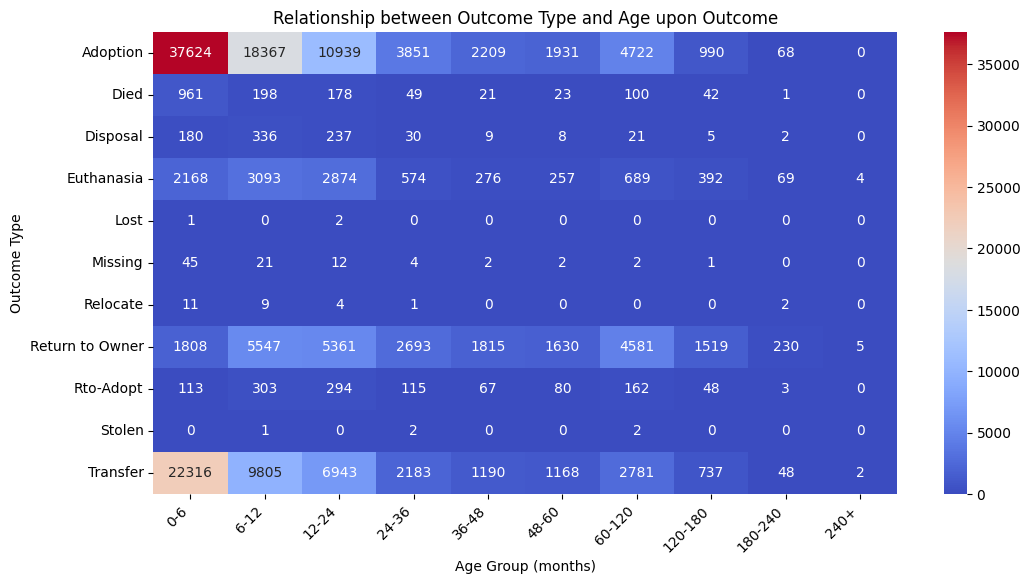

In [118]:
bins = [0, 6, 12, 24, 36, 48, 60, 120, 180, 240, 300]
labels = ['0-6', '6-12', '12-24', '24-36', '36-48', '48-60', '60-120', '120-180', '180-240', '240+']
outcomes_df['Age Group'] = pd.cut(outcomes_df['Age upon Outcome (months)'], bins=bins, labels=labels)

heatmap_data = pd.crosstab(outcomes_df['Outcome Type'], outcomes_df['Age Group'])

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Relationship between Outcome Type and Age upon Outcome')
plt.xlabel('Age Group (months)')
plt.ylabel('Outcome Type')
plt.xticks(rotation=45, ha='right')
plt.show()

It can be seen from the map that mostly young animals are being taken from the shelter. Quite a lot of young animals are also euthanized, which indicates serious health problems that are not comparable to life. Among older animals, it is common to return to their owners or to be adopted.

## 4) Zadané otázky

- **Description of the relationship between the Outcome Type and Intake Type attributes**

We will use a heat map, but before that we will combine intakes_df and outcomes_df into one dataframe by Animal ID

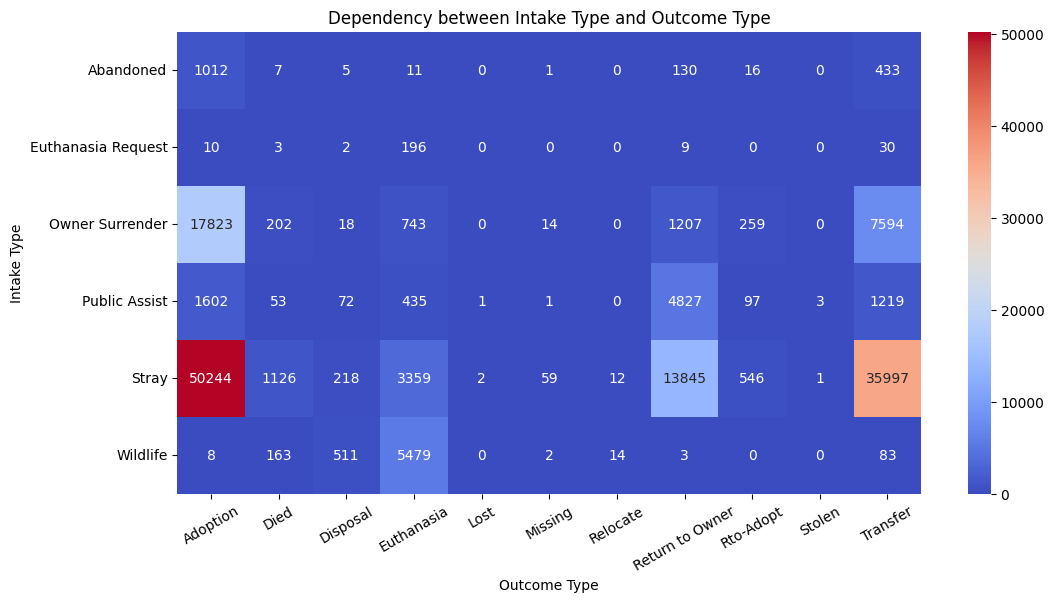

In [119]:
merged_df = pd.merge(intakes_df, outcomes_df, on='Animal ID')

merged_df = merged_df.drop_duplicates(subset='Animal ID')

contingency_table = pd.crosstab(merged_df['Intake Type'], merged_df['Outcome Type'])

plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Dependency between Intake Type and Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Intake Type')
plt.xticks(rotation=30)
plt.show()

It can be seen that most of the relatively healthy animals end up in new families for them, which is good news. Note also that a considerable number are moving to other places, which may indicate that the shelter in our task is a hub distributing animals to other organizations

- **Description of the relationship between the age of the animal and the chance of Adoption**

We use a Box Plot that will help us determine the frequency of Adoption by the age of the animals

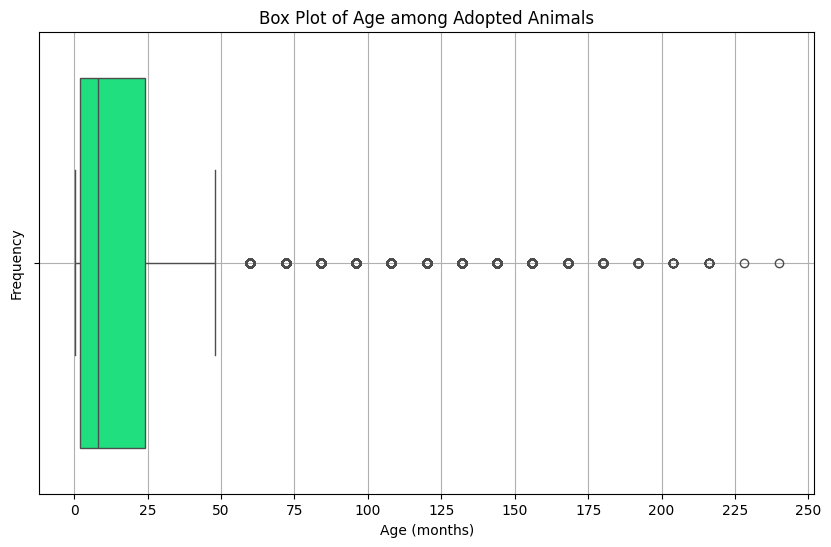

In [120]:
adopted_animals = outcomes_df[outcomes_df['Outcome Type'] == 'Adoption']

plt.figure(figsize=(10, 6))
sns.boxplot(data=adopted_animals, x='Age upon Outcome (months)', color='springgreen')

plt.title('Box Plot of Age among Adopted Animals')
plt.xlabel('Age (months)')
plt.ylabel('Frequency')
plt.locator_params(axis='x', nbins=12)
plt.grid(True)
plt.show()


We can see that an adoption is primarily skewed towards younger animals, with very few older animals being adopted. This suggests a strong preference among adopters for younger animals, while older animals have a lower likelihood of adoption, as evidenced by their outlier status on the plot.

- **Distribution of the number of accepted animals by month**

To begin with, let's calculate how many animals were accepted on average by month for the entire observed period

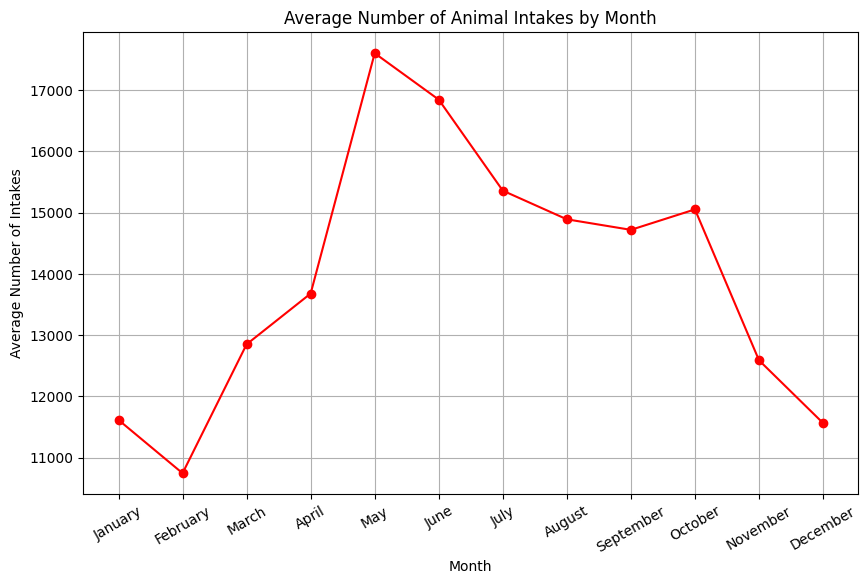

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

average_monthly_intakes = intakes_df.groupby('Month').size().reset_index(name='Intakes')

average_monthly_intakes = average_monthly_intakes.groupby('Month')['Intakes'].mean()

average_monthly_intakes = average_monthly_intakes.sort_index()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
plt.plot(month_names, average_monthly_intakes.values, marker='o', color='red')
plt.title('Average Number of Animal Intakes by Month')
plt.xlabel('Month')
plt.xticks(rotation=30)
plt.ylabel('Average Number of Intakes')
plt.grid(True)
plt.show()


The chart suggests a strong seasonal trend in animal intakes, with the highest numbers in late spring and early summer, and the lowest in winter. Perhaps this distribution is due to the fact that stray animals are harder to detect in the cold season, as they hide in warm places inside buildings

## 5) Vlastní otázky

- **The main places in Austin where animals have been found recently**

Let's try to display on the map where animals have been found recently according to the data from locations.csv. To do this, we import the folium library, which has a wide range of functionality for visualizing data on the map. We will not use data from the Found Locations column that does not explicitly specify the coordinates

In [125]:
import folium
import re
from folium.plugins import HeatMap

locations_df = pd.read_csv('locations.csv')

def extract_coordinates(location):
    match = re.search(r'\((\-?\d+\.\d+),\s*(\-?\d+\.\d+)\)', location)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None

locations_df['Coordinates'] = locations_df['Found Location'].apply(extract_coordinates)

locations_with_coords = locations_df.dropna(subset=['Coordinates'])

austin_map = folium.Map(location=[30.2672, -97.7431], zoom_start=11) # Austin coordinates

heat_data = [[row['Coordinates'][0], row['Coordinates'][1]] for _, row in locations_with_coords.iterrows()]

HeatMap(heat_data).add_to(austin_map)

austin_map

It can be noted that recently animals have been found closer to the edges of the city, which may indicate that there are no suitable conditions for survival in the center for them

- **Percentage of animals who received euthanasia, according to their state of health**

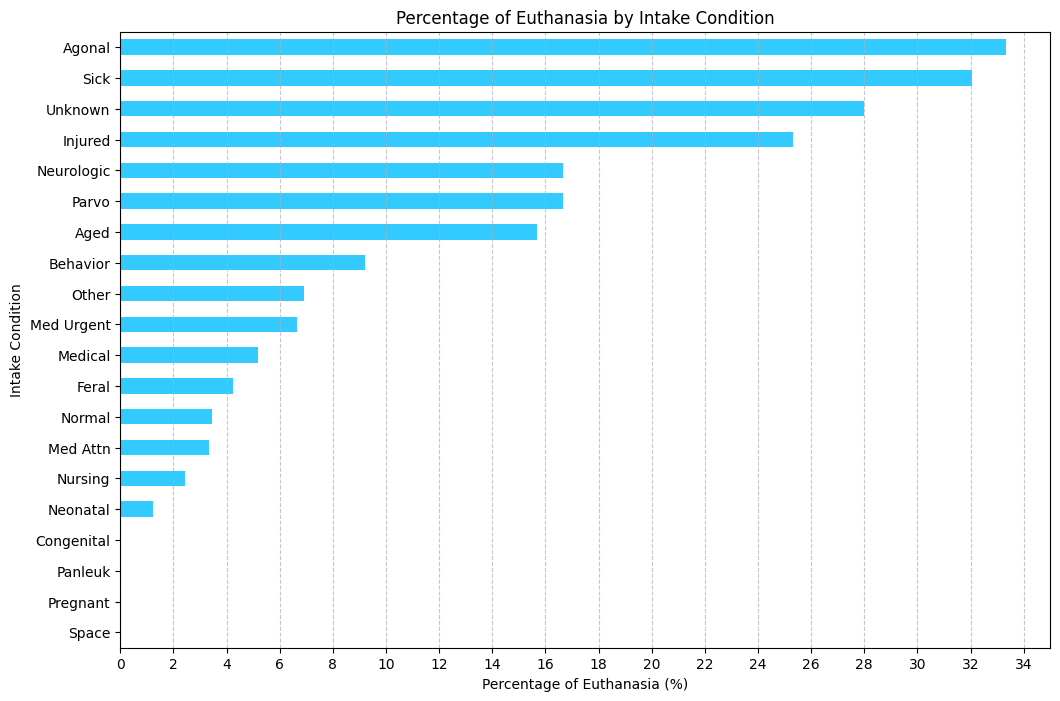

In [123]:
total_counts = intakes_df['Intake Condition'].value_counts()

euthanized_animals = merged_df[merged_df['Outcome Type'] == 'Euthanasia']

euthanasia_counts = euthanized_animals['Intake Condition'].value_counts()

euthanasia_percentages = (euthanasia_counts / total_counts * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
euthanasia_percentages.plot(kind='barh', color='deepskyblue', alpha=0.8)
plt.title('Percentage of Euthanasia by Intake Condition')
plt.xlabel('Percentage of Euthanasia (%)')
plt.ylabel('Intake Condition')
plt.locator_params(axis='x', nbins=18)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

plt.show()

The bar chart shows that about a third of Sick and Agonal animals are euthanized. It can be seen that 3-4% of Normal animals also receive euthanasia, which may indicate a decrease in their health already in the shelter

- **Percentage of animals who were returned to their owners, according to their Outcome Age**

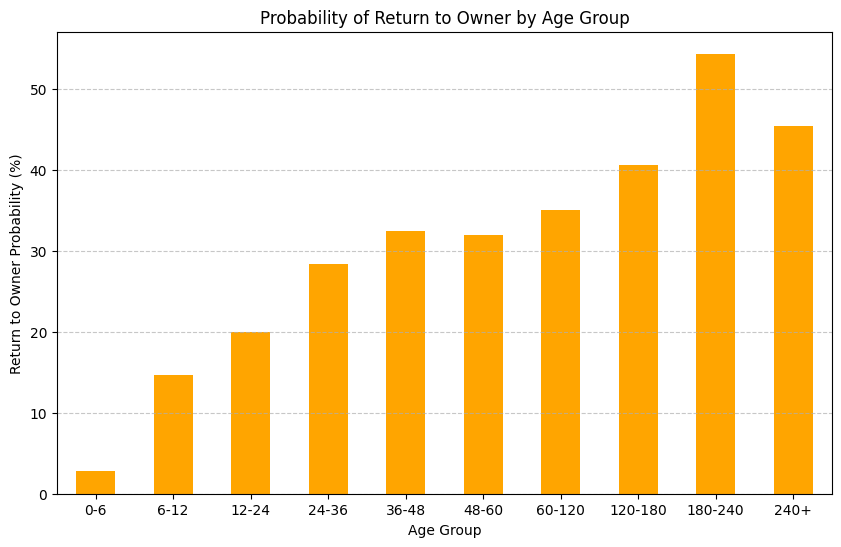

In [124]:
total_counts = outcomes_df['Age Group'].value_counts()

return_counts = outcomes_df[outcomes_df['Outcome Type'] == 'Return to Owner']['Age Group'].value_counts()

return_probabilities = (return_counts / total_counts * 100).sort_index()

plt.figure(figsize=(10, 6))
return_probabilities.plot(kind='bar', color='orange')
plt.title('Probability of Return to Owner by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Return to Owner Probability (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


The chart shows that older animals have a higher probability of being returned to their owners, with the highest return rates observed for animals over 15 years old. Younger animals, especially those under 6 months, are much less likely to be reclaimed